# ePSproc LF/AF function verification & tests

- 06/07/20 v3 Updated plotting codes & added AF tests.
- 26/06/20 v2
- 19/06/20 v1

For LF and AF calculations, trying to get to the bottom of issues with magnitudes and/or phases and/or formalism differences with raw ePS matrix elements.

## Formalism

Test cases: 

1. ePS matrix elements with formalism from [1], for LF cross-sections and $\beta_{2}$
2. ePSproc AF calculations, for LF cross-sections and $\beta_{2}$. 

The AF calculations should reduce to the LF case for an isotropic ensemble, and both cases should match the "direct" ePS GetCro outputs (LF). Hopefully this should clear up any outstanding issues with normalisation, units, scale-factors, phase conventions etc. For details of the AF code, see [the method dev notes](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html).

(For MF verification, see [the MFPADs](https://epsproc.readthedocs.io/en/dev/demos/ePSproc_demo_Aug2019.html#Calculate-MFPADs) and [associated $\beta_{LM}$](https://epsproc.readthedocs.io/en/dev/demos/ePSproc_BLM_calc_demo_Sept2019.html#Benchmark-vs.-) notebooks, where the numerics are verified for the NO2 test case, although the total cross-sections may still have issues (for more discussion, see [the Matlab code release software paper](https://www.authorea.com/users/71114/articles/122402/_show_article)). The geometric tensor version of the [MF calculations is also verified against the same test case](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt2_170320_v140420.html#Verification---test-vs.-existing-calcs).)


[1] *Cross section and asymmetry parameter calculation for sulfur 1s photoionization of SF6*, A. P. P. Natalense and R. R. Lucchese, J. Chem. Phys. 111, 5344 (1999), http://dx.doi.org/10.1063/1.479794

[2] Reid, Katharine L., and Jonathan G. Underwood. “Extracting Molecular Axis Alignment from Photoelectron Angular Distributions.” The Journal of Chemical Physics 112, no. 8 (2000): 3643. https://doi.org/10.1063/1.480517.

[3] Underwood, Jonathan G., and Katharine L. Reid. “Time-Resolved Photoelectron Angular Distributions as a Probe of Intramolecular Dynamics: Connecting the Molecular Frame and the Laboratory Frame.” The Journal of Chemical Physics 113, no. 3 (2000): 1067. https://doi.org/10.1063/1.481918.

[4] Stolow, Albert, and Jonathan G. Underwood. “Time-Resolved Photoelectron Spectroscopy of Non-Adiabatic Dynamics in Polyatomic Molecules.” In Advances in Chemical Physics, edited by Stuart A. Rice, 139:497–584. Advances in Chemical Physics. Hoboken, NJ, USA: John Wiley & Sons, Inc., 2008. https://doi.org/10.1002/9780470259498.ch6.

### Formalism: LF case with CG terms

As given in ref. [1]. This is now implemented in  [implemented in `ePSproc.lfblmGeom`](https://epsproc.readthedocs.io/en/dev/modules/epsproc.geomFunc.lfblmGeom.html). NOTE - that the $M$ term here is an MF projection term, and should be summed over for the final LF result.

---

The matrix elements $I_{\mathbf{k},\hat{n}}^{(L,V)}$ of Eqs. (8)
and (9) can be expanded in terms of the $X_{lh}^{p\mu}$ functions
of Eq. (7) as$^{14}$

\begin{equation}
I_{\mathbf{k},\hat{n}}^{(L,V)}=\left[\frac{4\pi}{3}\right]^{1/2}\sum_{p\mu lhv}I_{lhv}^{p\mu(L,V)}X_{lh}^{p\mu}(\hat{k})X_{1v}^{p_{v}\mu_{v}}(\hat{n}).
\end{equation}

{[}Note here the final term gives polarization (dipole) terms, with
$l=1$, $h=v$, corresponding to a photon with one unit of angular
momentum and projections $v=-1,0,1$, correlated with irreducible
representations $p_{v}\mu_{v}$.{]}

The differential cross section is given by

\begin{equation}
\frac{d\sigma^{L,V}}{d\Omega_{\mathbf{k}}}=\frac{\sigma^{L,V}}{4\pi}[1+\beta_{\mathbf{k}}^{L,V}P_{2}(\cos\theta)],
\end{equation}

where the asymmetry parameter can be written as$^{14}$

\begin{eqnarray}
\beta_{\mathbf{k}}^{L,V} & = & \frac{3}{5}\frac{1}{\sum_{p\mu lhv}|I_{\mathbf{k},\hat{n}}^{(L,V)}|^{2}}\sum_{\stackrel{p\mu lhvmm_{v}}{p'\mu'l'h'v'm'm'_{v}}}(-1)^{m'-m_{v}}I_{\mathbf{k},\hat{n}}^{(L,V)}\nonumber \\
 & \times & \left(I_{\mathbf{k},\hat{n}}^{(L,V)}\right)^{*}b_{lhm}^{p\mu}b_{l'h'm'}^{p'\mu'*}b_{1vm_{v}}^{p_{v}\mu_{v}}b_{1v'm'_{v}}^{p'_{v}\mu'_{v}*}\nonumber \\
 & \times & [(2l+1)(2l'+1)]^{1/2}(1100|20)(l'l00|20)\nonumber \\
 & \times & (11-m'_{v}m_{v}|2M')(l'l-m'm|2-M'),
\end{eqnarray}

and the $(l'lm'm|L'M')$ are the usual Clebsch--Gordan coefficients.
The total cross section is

\begin{equation}
\sigma^{L,V}=\frac{4\pi^{2}}{3c}E\sum_{p\mu lhv}|I_{\mathbf{k},\hat{n}}^{(L,V)}|^{2},
\end{equation}

where c is the speed of light.

---

### AF formalism

The original (full) form for the AF equations, as [implemented in `ePSproc.afblm`](https://epsproc.readthedocs.io/en/dev/modules/epsproc.AFBLM.html) (NOTE - there are some corrections to be made here, which are not yet implemented in the base code, but are [now in the geometric version](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html)):

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{M}(-1)^{m}(-1)^{(\mu'-\mu_{0})}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
-m & m' & -M
\end{array}\right)\nonumber \\
 & \times & I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)\\
 & \times & \sum_{P,R,R'}(2P+1)(-1)^{(R'-R)}\left(\begin{array}{ccc}
1 & 1 & P\\
\mu_{0} & -\mu_{0} & R
\end{array}\right)\left(\begin{array}{ccc}
1 & 1 & P\\
\mu & -\mu' & R'
\end{array}\right)\\
 & \times & \sum_{K,Q,S}(2K+1)^{1/2}(-1)^{K+Q}\left(\begin{array}{ccc}
P & K & L\\
R & -Q & -M
\end{array}\right)\left(\begin{array}{ccc}
P & K & L\\
R' & -S & S-R'
\end{array}\right)A_{Q,S}^{K}(t)
\end{eqnarray}

Where $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)$ are the energy-dependent dipole matrix elements, and $A_{Q,S}^{K}(t)$ define the alignment parameters.

In terms of the geometric parameters, this can be rewritten as:

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & =(-1)^{M} & \sum_{P,R',R}{[P]^{\frac{1}{2}}}{E_{P-R}(\hat{e};\mu_{0})}\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R'}(\mu,P,R')B_{L,-M}(l,l',m,m')}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)\sum_{K,Q,S}\Delta_{L,M}(K,Q,S)A_{Q,S}^{K}(t)\label{eq:BLM-tidy-prod-2}
\end{eqnarray}

See the [method dev notebook](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_pt3_AFBLM_090620.html#) for more details. Both methods gave the same results for N2 test cases, so are at least consistent, but do not currently match ePS GetCro outputs for the LF case.

### Numerics

In both LF and AF cases, the numerics tested herein are based on the geometric tensor expansion code, which has been verified for the MF case as noted above (for PADs at a single energy).

A few additional notes on the implementations...

- The matrix elements used are taken from the DumpIdy output segments of the ePS output file, which provide "phase corrected and properly normalized dynamical coefs".
- The matrix elements output by ePS are assumed to correspond to $I_{lhv}^{p\mu(L,V)}$ as defined above.
- The Scale Factor (SF) "to sqrt Mbarn" output with the matrix elements is assumed to correspond to the $\frac{4\pi^{2}}{3c}E$ term defined above, plus any other required numerical factors ($4\pi$ terms and similar).
    - The SF is energy dependent, but not continuum (or partial wave) dependent.
    - If correct, then using matrix elements * scale factor, should give correct results (as a function of $E$), while omitting the scale factor should still give correct PADs at any given $E$, but incorrect total cross-section and energy scaling.
    - This may be incorrect, and some other assumptions are tested herein.
- The AF and LF case should match for an isotropic distribution, defined as $A^{0}_{0,0}=1$. Additional normalisation required here...?
    - A factor of $\sqrt{(2K+1)}/8\pi^2$ might be required for correct normalisation, although shouldn't matter in this case. (See eqn. 47 in [4].)
    - For the LF case, as defined above, conversion from Legendre-normalised $\beta$ to spherical harmonic normalised $\beta$ is required for comparison with the AF formalism, where $\beta^{Sph}_{L,0} = \sqrt{(2L+1)/4\pi}\beta^{Lg}$

## Set up

In [1]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr

# Special functions
# from scipy.special import sph_harm
import spherical_functions as sf
import quaternion

# Performance & benchmarking libraries
# from joblib import Memory
# import xyzpy as xyz
import numba as nb

# Timings with ttictoc or time
# https://github.com/hector-sab/ttictoc
# from ttictoc import TicToc
import time

# Package fns.
# For module testing, include path to module here
import sys
import os

if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    
sys.path.append(modPath)
import epsproc as ep
# TODO: tidy this up!
from epsproc.util import matEleSelector
from epsproc.geomFunc import geomCalc, geomUtils
from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

* pyevtk not found, VTK export not available. 


In [2]:
hvPlotters.setPlotters()

## Test N2 case

### Load data

In [3]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data file
dataSet = ep.readMatEle(fileIn = dataFile)
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')  # XS info currently not set in NO2 sample file.

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of Cro

### Reference results from GetCro

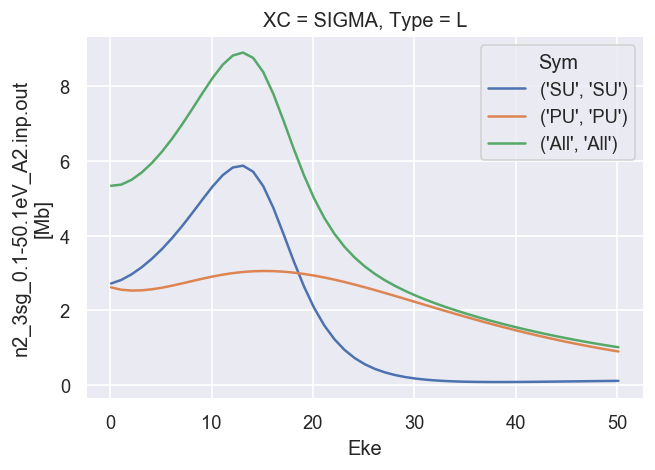

In [4]:
# Plot cross sections using Xarray functionality
dataXS[0].sel({'Type':'L', 'XC':'SIGMA'}).plot.line(x='Eke');

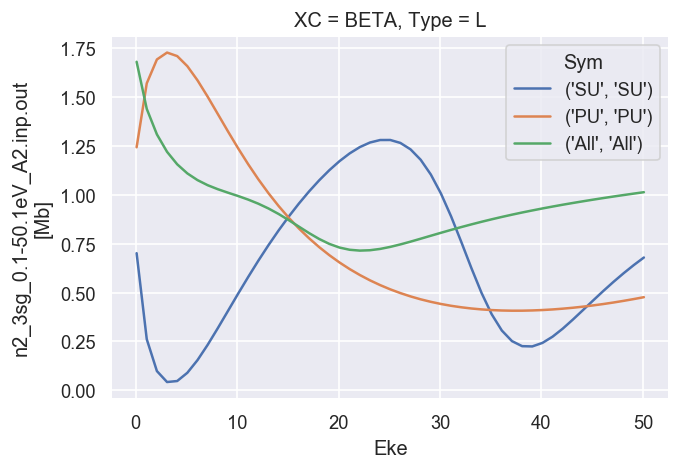

In [5]:
# Plot B2
dataXS[0].sel({'Type':'L', 'XC':'BETA'}).plot.line(x='Eke');

### Test LF calculations (CG version)

#### Without sym summation

In [19]:
dataSet[0].coords

Coordinates:
    Ehv      (Eke) float64 15.68 16.68 17.68 18.68 ... 62.68 63.68 64.68 65.68
  * LM       (LM) MultiIndex
  - l        (LM) int64 1 1 1 3 3 3 5 5 5 7 7 7 9 9 9 11 11 11
  - m        (LM) int64 -1 0 1 -1 0 1 -1 0 1 -1 0 1 -1 0 1 -1 0 1
  * Type     (Type) object 'L' 'V'
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
  * mu       (mu) int64 -1 0 1
  * it       (it) int64 1
  * Sym      (Sym) MultiIndex
  - Cont     (Sym) object 'SU' 'PU'
  - Targ     (Sym) object 'SG' 'SG'
  - Total    (Sym) object 'SU' 'PU'
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)

In [6]:
# Set parameters
SFflag = False  # Multiply matrix elements by SF?
symSum = False  # Sum over symmetries?
phaseConvention = 'S'
thres = 1e-2
selDims = {'it':1, 'Type':'L'}
thresDims = 'Eke'

# Set terms for testing - NOTE ORDERING HERE may affect CG term!!!
dlistMatE = ['lp', 'l', 'L', 'mp', 'm', 'M']  # Match published terms
dlistP = ['p1', 'p2', 'L', 'mup', 'mu', 'M']
# dlistMatE = ['l', 'lp', 'L', 'm', 'mp', 'M']  # Standard terms
# dlistP = ['p1', 'p2', 'L', 'mu', 'mup', 'M']


# Set matrix elements
matE = dataSet[0].copy()

# Calculate betas
BetaNormXS, BetaNorm, BetaRaw, XSmatE = lfblmXprod(matE, symSum = symSum, SFflag = SFflag, 
                              thres = thres, thresDims = thresDims, selDims = selDims, 
                              phaseConvention = phaseConvention,
                              dlistMatE = dlistMatE, dlistP = dlistP)

# Here BetaNormXS includes the correct normalisation term as per the original formalism, and XSmatE is the sum of the squared matrix elements, as used for the normalisation (== cross section without correct scaling).

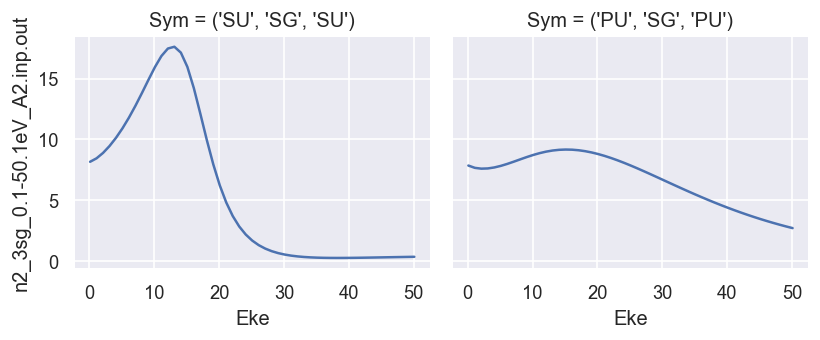

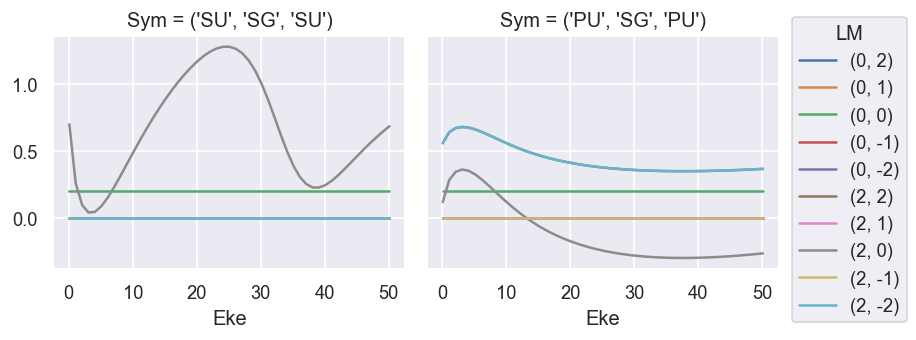

In [7]:
plotThres = None

ep.util.matEleSelector(XSmatE, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');
ep.util.matEleSelector(BetaNormXS, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');

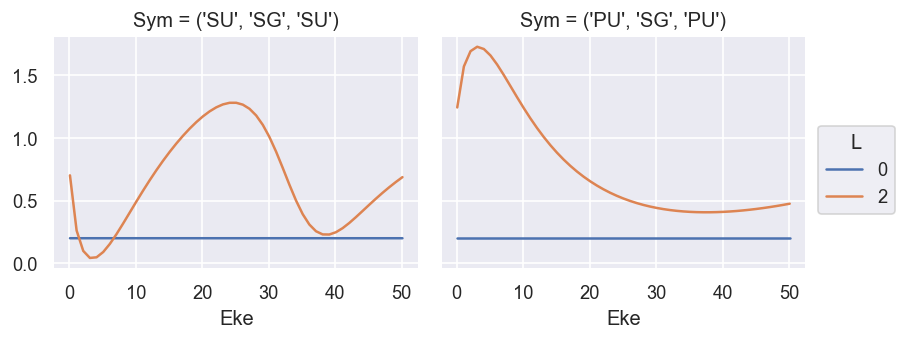

In [8]:
# Summing over M gives the final LF terms, as defined above.
# The B0 term (==cross section) is not correctly scaled here.
# The B2 term matches the GetCro reference results.
ep.util.matEleSelector(BetaNormXS.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', col='Sym');

#### With sym summation

In [9]:
# Set parameters
SFflag = False  # Multiply matrix elements by SF?
symSum = True  # Sum over symmetries?
phaseConvention = 'S'
thres = 1e-2
selDims = {'it':1, 'Type':'L'}
thresDims = 'Eke'

# Set terms for testing - NOTE ORDERING HERE may affect CG term!!!
dlistMatE = ['lp', 'l', 'L', 'mp', 'm', 'M']  # Match published terms
dlistP = ['p1', 'p2', 'L', 'mup', 'mu', 'M']
# dlistMatE = ['l', 'lp', 'L', 'm', 'mp', 'M']  # Standard terms
# dlistP = ['p1', 'p2', 'L', 'mu', 'mup', 'M']


# Set matrix elements
matE = dataSet[0].copy()

# Calculate betas
BetaNormXS, BetaNorm, BetaRaw, XSmatE = lfblmXprod(matE, symSum = symSum, SFflag = SFflag, 
                              thres = thres, thresDims = thresDims, selDims = selDims, 
                              phaseConvention = phaseConvention,
                              dlistMatE = dlistMatE, dlistP = dlistP)

# Here BetaNormXS includes the correct normalisation term as per the original formalism, and XSmatE is the sum of the squared matrix elements, as used for the normalisation (== cross section without correct scaling).

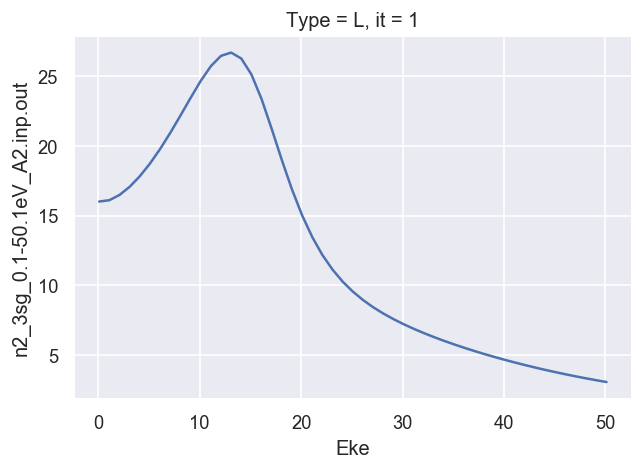

In [10]:
plotThres = None

ep.util.matEleSelector(XSmatE, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

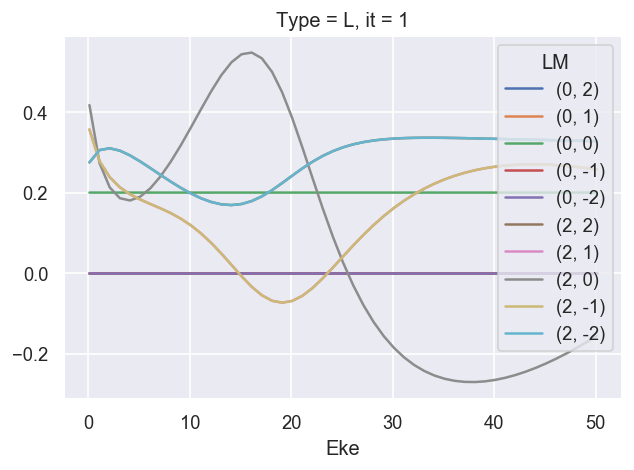

In [11]:
ep.util.matEleSelector(BetaNormXS, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

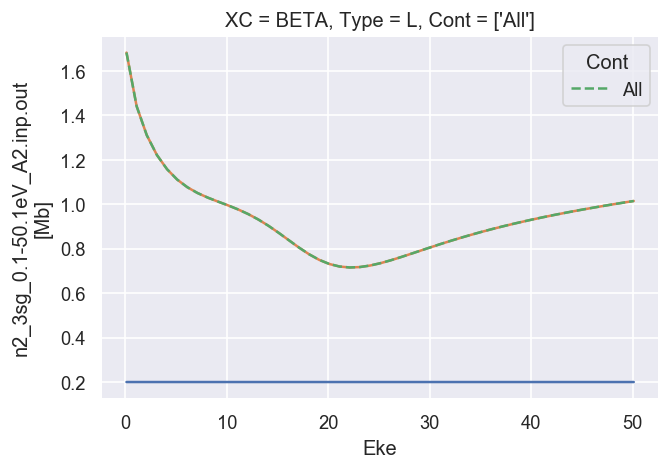

In [60]:
# Summing over M gives the final LF terms, as defined above.
# The B0 term (==cross section) is not correctly scaled here.
# The B2 term matches the GetCro reference results.
ep.util.matEleSelector(BetaNormXS.unstack('LM').sum('M'), thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');
dataXS[0].sel({'Type':'L', 'XC':'BETA', 'Total':'All'}).plot.line(x='Eke', linestyle='dashed');  # Reference results

*** 26/06/20 LF CG calcs OK for $\beta_2$, still need to fix cross-section scaling.

### Conversion & normalisation

This result is $\beta_2$ for a Legendre Polynomial expansion, as shown above.

Test:

- Conversion to $Y_{L,M}$ form.
- LF-PADs to check numerics.
- Confirm total cross-section value & normalisation.

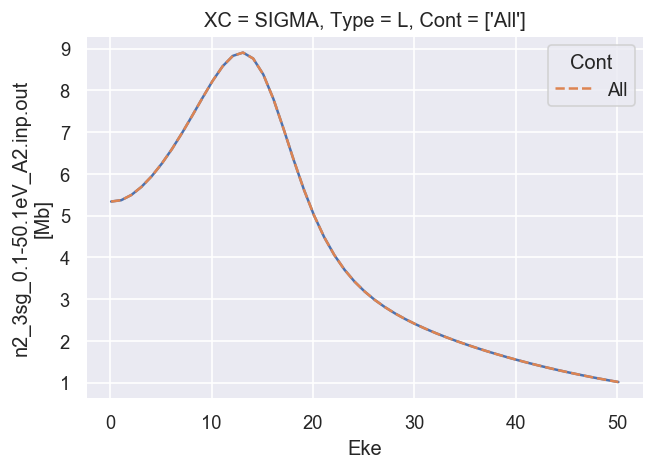

In [13]:
# Check value for XS
# BetaNormXS.unstack('LM').sum('M').sel({'L':0})

# FACTOR OF 3 - just degeneracy term in summation.  WHAT ABOUT SF...?
((XSmatE)*1/3).real.plot.line(x='Eke')

# Compare with reference results
(dataXS[0].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'})).plot.line(x='Eke', linestyle='dashed');

# OK

In [14]:
BetaNormXS_sph = ep.conversion.conv_BL_BLM(BetaNormXS.unstack('LM').sum('M'), to='sph')

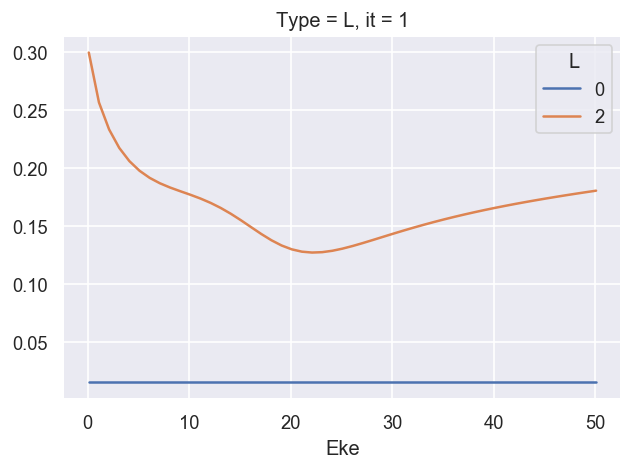

In [15]:
# Check conversion to Sph normalised betas
ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');

## Test vs. AF code

Should be identical for unaligned case.

06/07/20 - quick testing, things are CLOSE to reference results above, but there still seems to be inconsistencies somewhere, possibly in renorm only?

In [101]:
phaseConvention = 'E'  # Set phase conventions used in the numerics - for ePolyScat matrix elements, set to 'E', to match defns. above.

symSum = True  # Sum over symmetry groups, or keep separate?
SFflag = True  # Include scaling factor to Mb in calculation?

SFflagRenorm = False  # Renorm terms
BLMRenorm = False

thres = 1e-6
RX = ep.setPolGeoms()  # Set default pol geoms (z,x,y), or will be set by mfblmXprod() defaults - FOR AF case this is only used to set 'z' geom for unity wigner D's - should rationalise this!

start = time.time()
mTermST, mTermS, mTermTest = ep.geomFunc.afblmXprod(dataSet[0], QNs = None, RX=RX, thres = thres, selDims = {'it':1, 'Type':'L'}, thresDims='Eke', 
                                                    symSum=symSum, SFflag=SFflag, phaseConvention=phaseConvention, BLMRenorm=BLMRenorm)
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, {2} polarizations, threshold={3}.'.format((end-start), mTermST.Eke.size, RX.size, thres))

# Elapsed time = 3.3885273933410645 seconds, for 51 energy points, 3 polarizations, threshold=0.01.
# Elapsed time = 5.059587478637695 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.

Elapsed time = 4.200884819030762 seconds, for 51 energy points, 3 polarizations, threshold=1e-06.


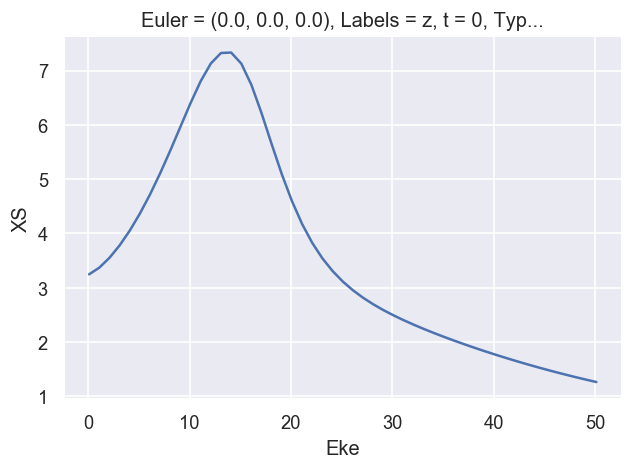

In [102]:
mTermST.XS.real.squeeze().plot.line(x='Eke');

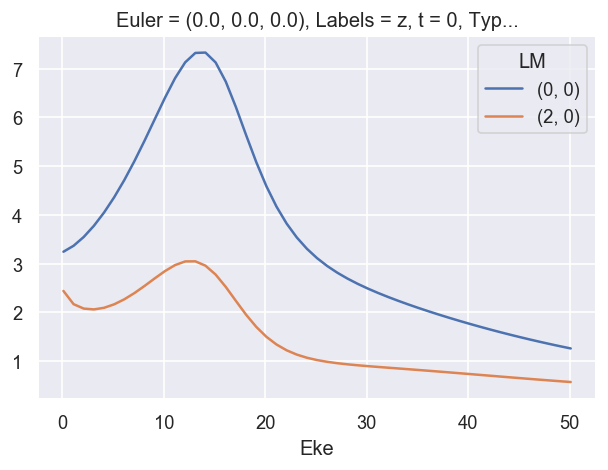

In [103]:
ep.util.matEleSelector(mTermST, thres = 0.1, dims='Eke').real.squeeze().plot.line(x='Eke');

In [104]:
mTermST_lg = ep.conversion.conv_BL_BLM(mTermST, to='lg')

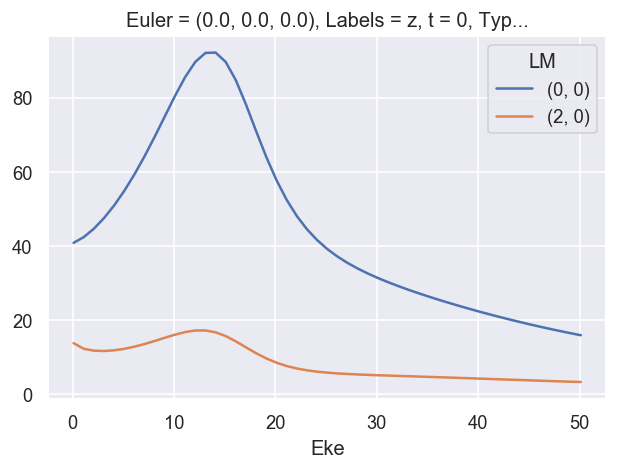

In [105]:
ep.util.matEleSelector(mTermST_lg, thres = 0.1, dims='Eke').real.squeeze().plot.line(x='Eke');

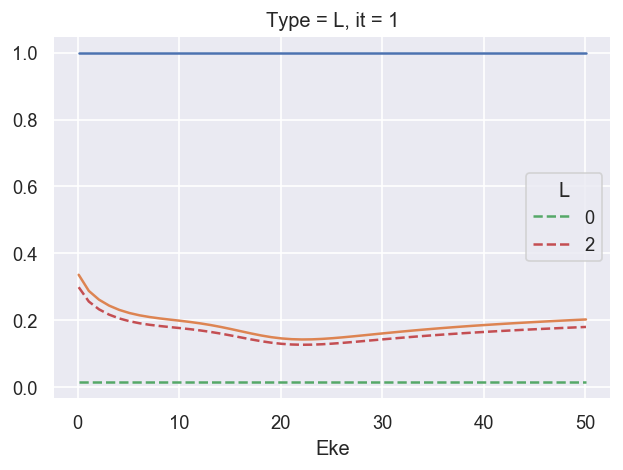

In [106]:
ep.util.matEleSelector(mTermST_lg/mTermST_lg.sel({'L':0,'M':0}), thres = 0.1, dims='Eke').real.squeeze().plot.line(x='Eke');
ep.util.matEleSelector(BetaNormXS_sph, thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke', linestyle='dashed');

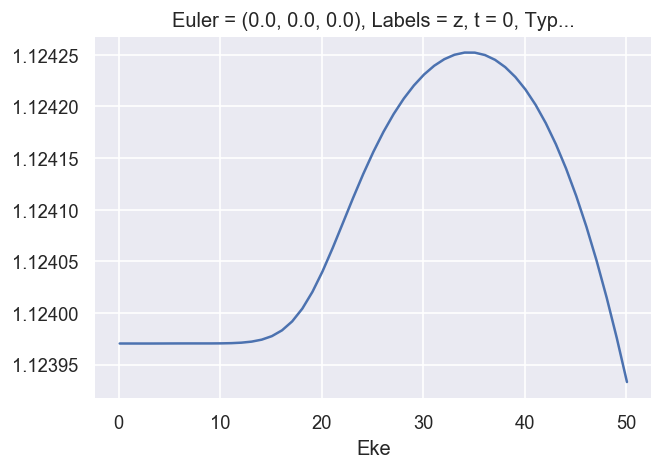

In [126]:
# Check B2 differences
diffVals = ((mTermST_lg/mTermST_lg.sel({'L':0,'M':0})).unstack('LM')/BetaNormXS_sph)
ep.util.matEleSelector(diffVals.sel({'L':2}), thres = plotThres, dims='Eke', sq=True, drop=True).real.plot.line(x='Eke');
# May just be pi factors issue?
# Close to pi/3, possible missing renorm + degen factor?

In [107]:
# Hmmm - have energy dependent norm factor. Weird - this is present both with and without SF included, although abs values change.
((mTermST.XS.real)/dataXS[0].sel({'Type':'L', 'XC':'SIGMA', 'Sym':'All'})) #.real.plot.line(x='Eke')

<xarray.DataArray (t: 1, Eke: 51, Cont: 1)>
array([[[0.60821947],
        [0.62730561],
        [0.64583726],
        [0.66385559],
        [0.68138471],
        [0.69849007],
        [0.715178  ],
        [0.73148102],
        [0.74743725],
        [0.76305829],
        [0.77836365],
        [0.79336888],
        [0.80810482],
        [0.82257474],
        [0.83678601],
        [0.85076662],
        [0.86451922],
        [0.87806121],
        [0.89138656],
        [0.90452428],
        [0.91748751],
        [0.93023701],
        [0.94284135],
        [0.95527353],
        [0.96755411],
        [0.97965667],
        [0.99163795],
        [1.00344096],
        [1.01513775],
        [1.02667562],
        [1.0381316 ],
        [1.04941635],
        [1.0605799 ],
        [1.07165085],
        [1.08260293],
        [1.09344924],
        [1.10420611],
        [1.11479442],
        [1.12538774],
        [1.1357554 ],
        [1.14610053],
        [1.15638693],
        [1.16650775],
        [1.17660887],
        [1.18660497],
        [1.19649582],
        [1.20628684],
        [1.2159891 ],
        [1.22573031],
        [1.23531534],
        [1.24475529]]])
Coordinates:
    Euler    object (0.0, 0.0, 0.0)
    Labels   <U18 'z'
  * t        (t) int32 0
    Ehv      (Eke) float64 15.68 16.68 17.68 18.68 ... 62.68 63.68 64.68 65.68
    Type     <U1 'L'
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
    it       int64 1
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
    XS       (t, Eke) complex128 (3.2451549605799546-5.631706323741439j) ... (1.2604392026856044-0.5222030163523966j)
    XC       <U5 'SIGMA'
  * Cont     (Cont) object 'All'

In [39]:
mTermST_sph

<xarray.DataArray (t: 1, Eke: 51, LM: 2)>
array([[[0.01384766-0.0240315j , 0.02328283-0.04040548j],
        [0.01480031-0.02414489j, 0.02131646-0.0347752j ],
        [0.01598962-0.02460971j, 0.0209432 -0.0322338j ],
        [0.01738187-0.02532038j, 0.02121649-0.03090632j],
        [0.01896407-0.02622147j, 0.02193704-0.03033218j],
        [0.02073019-0.02727743j, 0.02301512-0.03028401j],
        [0.0226717 -0.0284561j , 0.02439169-0.03061493j],
        [0.02477071-0.02971981j, 0.02600771-0.03120396j],
        [0.02699267-0.03101808j, 0.0277861 -0.03192982j],
        [0.02927613-0.03227893j, 0.02961718-0.03265496j],
        [0.03151808-0.03339761j, 0.03134483-0.03321402j],
        [0.03355748-0.03422584j, 0.0327565 -0.03340891j],
        [0.03516675-0.03457138j, 0.0335889 -0.03302025j],
        [0.03607192-0.03422478j, 0.03356936-0.03185037j],
        [0.03602304-0.03302684j, 0.0325061 -0.02980243j],
        [0.03490696-0.03096045j, 0.03040127-0.02696417j],
        [0.03283678-0.02820499j, 0.02750634-0.02362644j],
        [0.03013383-0.02509129j, 0.02424879-0.02019104j],
        [0.02719875-0.02197492j, 0.02106472-0.01701901j],
        [0.02436703-0.01911939j, 0.01825727-0.01432542j],
        [0.02183818-0.01665491j, 0.01595663-0.01216934j],
        [0.01968452-0.01460313j, 0.01416072-0.01050526j],
        [0.01789594-0.01292392j, 0.01279794-0.0092423j ],
        [0.01642338-0.01155385j, 0.01177553-0.00828409j],
        [0.0152071 -0.01042858j, 0.01100593-0.00754754j],
        [0.01419111-0.00949262j, 0.010417  -0.00696806j],
        [0.01332854-0.00870173j, 0.00995355-0.00649832j],
        [0.01258249-0.00802219j, 0.00957522-0.00610485j],
        [0.01192489-0.00742887j, 0.0092534 -0.0057646j ],
        [0.01133491-0.00690328j, 0.00896822-0.0054619j ],
        [0.01079723-0.00643186j, 0.00870624-0.00518627j],
        [0.01030074-0.00600466j, 0.00845853-0.00493077j],
        [0.00983743-0.0056143j , 0.00821932-0.00469084j],
        [0.0094015 -0.00525529j, 0.00798507-0.00446353j],
        [0.00898879-0.00492346j, 0.00775373-0.00424697j],
        [0.00859633-0.00461559j, 0.00752424-0.00403995j],
        [0.00822195-0.00432915j, 0.00729623-0.00384173j],
        [0.00786408-0.00406212j, 0.00706975-0.00365182j],
        [0.00752155-0.00381281j, 0.0068451 -0.00346991j],
        [0.00719349-0.00357983j, 0.00662274-0.00329579j],
        [0.00687922-0.00336194j, 0.00640318-0.0031293j ],
        [0.00657816-0.0031581j , 0.00618695-0.00297028j],
        [0.00628987-0.00296734j, 0.00597456-0.00281859j],
        [0.0060139 -0.0027888j , 0.00576649-0.00267406j],
        [0.00574989-0.00262169j, 0.00556314-0.00253654j],
        [0.00549745-0.00246528j, 0.00536487-0.00240582j],
        [0.00525622-0.00231889j, 0.00517197-0.00228172j],
        [0.00502585-0.00218188j, 0.00498469-0.00216401j],
        [0.00480598-0.00205366j, 0.00480319-0.00205247j],
        [0.00459623-0.00193367j, 0.00462758-0.00194686j],
        [0.00439626-0.00182138j, 0.00445796-0.00184694j]]])
Coordinates:
    Euler    object (0.0, 0.0, 0.0)
    Labels   <U18 'z'
  * t        (t) int32 0
    Ehv      (Eke) float64 15.68 16.68 17.68 18.68 ... 62.68 63.68 64.68 65.68
    Type     <U1 'L'
  * Eke      (Eke) float64 0.1 1.1 2.1 3.1 4.1 5.1 ... 46.1 47.1 48.1 49.1 50.1
    it       int64 1
    SF       (Eke) complex128 (2.1560627+3.741674j) ... (4.4127053+1.8281945j)
  * LM       (LM) MultiIndex
  - L        (LM) int64 0 2
  - M        (LM) int64 0 0
    XS       (t, Eke) complex128 (0.1740147903229411-0.30198872072078436j) ... (0.055245008551718745-0.022888140929489487j)